## Interactive OpenCV and Real-Time Video

In this section, we explore more **interactive and real-time applications** using OpenCV. The key topics include:

- Handling **mouse events** to draw shapes like circles, rectangles, and freehand brush strokes  
- Implementing **live previews** and **undo functionality** for drawing  
- Using **keyboard input** to change colors and clear the canvas  
- Creating **trackbars** to interactively adjust parameters such as image blending and color channel intensities  
- Capturing **live video from webcams** and processing frames in real-time  
- Saving **webcam video** to a file with adjustable codec and frame size  
- Capturing the **screen or a region of the screen** for live monitoring or recording  

By following these exercises, you will learn how to create **interactive OpenCV applications**, manipulate images in real-time, and capture video from different sources.


### Importing Libraries

Before starting, we need to import the required libraries:

- **OpenCV (`cv2`)** → the main library for image processing and computer vision tasks.  
- **NumPy (`np`)** → useful for handling arrays and numerical operations.  
- **Matplotlib (`plt`)** → helps visualize images and results inside the notebook.  


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Exploring Mouse Events in OpenCV  

OpenCV allows interaction using **mouse events** (e.g., left click, right click, double click, drag).  
To see the available events, we can filter all attributes of `cv` that contain `"EVENT"` in their name.  

In [2]:
event=[i for i in dir(cv) if "EVENT" in i]
print(event)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


### Drawing Shapes with Mouse Events  

This example shows how to use **mouse events** in OpenCV to draw shapes directly on an image.  

1. First, we create a blank (black) image with `np.zeros`.  
2. Then, we define a function `draw_circle` that reacts to mouse events:  
   - If the **left mouse button** is clicked (`EVENT_LBUTTONDOWN`), a blue circle is drawn at the click position.  
   - If the **right mouse button** is clicked (`EVENT_RBUTTONDOWN`), a green rectangle is drawn at the click position.  
3. We link this function to a window using `cv.setMouseCallback`.  
4. A `while` loop keeps the window open and updates the image as long as the user interacts.  
5. The loop exits when the **Esc key (27)** is pressed.  
6. `cv.destroyAllWindows()` is then called to close any OpenCV windows that were opened.  

Finally, we use `matplotlib` (`plt.imshow`) to display the final image inside the notebook environment.  

This setup lets you **interactively draw** on an image:  
- **Left click** → blue circle  
- **Right click** → green rectangle  
- **Esc** → close the window  


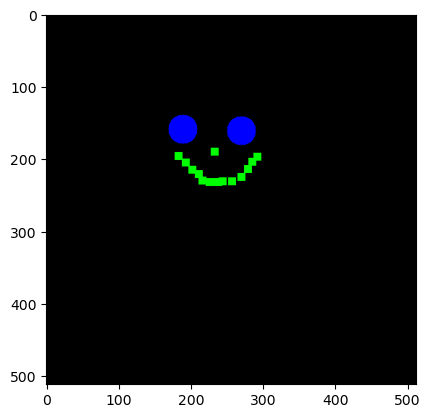

In [7]:
def draw_circle(event,x,y,flag,param):

    if event==cv.EVENT_LBUTTONDOWN:
        cv.circle(img,(x,y),20,(255,0,0),-1)
    elif event==cv.EVENT_RBUTTONDOWN:
        cv.rectangle(img,(x,y),(x+10,y-10),(0,255,0),-1)

img=np.zeros((512,512,3),"uint8")
cv.namedWindow("image")
cv.setMouseCallback("image",draw_circle)


while True:
    cv.imshow("image",img)
    if cv.waitKey(1) & 0xFF==27:
        break

cv.destroyAllWindows()   
plt.imshow(img[:,:,::-1])

### Freehand Drawing with the Mouse (Brush Tool)

In this example, we extend mouse interaction to create a **brush tool**, allowing us to draw freely on the image by holding and dragging the mouse.

1. A global variable `drawing` is used to track whether the left mouse button is pressed.  
2. Inside the function `brush`:  
   - `EVENT_LBUTTONDOWN` → activates drawing mode (sets `drawing = True`).  
   - `EVENT_MOUSEMOVE` → if drawing mode is active, a **green circle** is drawn at the current mouse position. Since this happens continuously while moving, it creates the effect of painting.  
   - `EVENT_LBUTTONUP` → deactivates drawing mode (sets `drawing = False`).  
3. We connect this function to a window using `cv.setMouseCallback("image", brush)`.  
4. The loop keeps updating the window until the **Esc key** is pressed.  
5. `cv.destroyAllWindows()` ensures all OpenCV windows are properly closed.  
6. Finally, the result is shown in the notebook with `plt.imshow`.  

With this setup, you can **draw freehand** on the canvas:  
- Hold **left click** → start drawing.  
- Move the mouse → paint on the image.  
- Release the left click → stop drawing.  
- Press **Esc** → exit.  


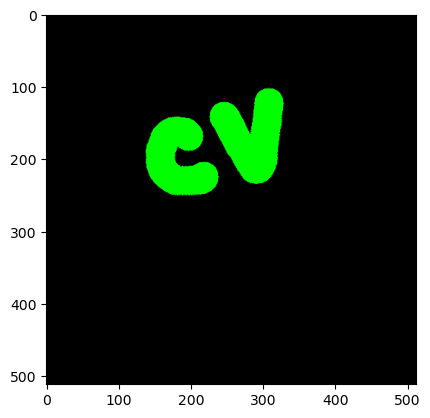

In [8]:
drawing=False
def brush(event,x,y,flag,param):
    global drawing

    if event==cv.EVENT_LBUTTONDOWN:
        drawing=True
    elif event==cv.EVENT_MOUSEMOVE:  
      if drawing==True:
           cv.circle(img,(x,y),20,(0,255,0),-1)
    elif event==cv.EVENT_LBUTTONUP:
        drawing=False
                                        
img=np.zeros((512,512,3),"uint8")

cv.namedWindow("image")
cv.setMouseCallback("image",brush)

while True:
    cv.imshow("image",img)
    if cv.waitKey(1) & 0xFF==27:
        break
cv.destroyAllWindows()
plt.imshow(img[:,:,::-1])

### Freehand Drawing with Multiple Colors  

This example extends the previous brush tool by allowing **color changes** using the right mouse button.  

1. **Global variables**:  
   - `drawing` → tracks whether we are currently drawing.  
   - `color` → current drawing color (initially green).  
   - `i` → index used to cycle through colors.  

2. Inside the `brush` function:  
   - `EVENT_RBUTTONDOWN` → cycles through a predefined list of colors `[green, blue, red]`. Each right-click changes the current drawing color.  
   - `EVENT_LBUTTONDOWN` → starts drawing.  
   - `EVENT_MOUSEMOVE` → while drawing, a circle of the **current color** is drawn at the mouse position, enabling freehand painting.  
   - `EVENT_LBUTTONUP` → stops drawing.  

3. The function is connected to the window using `cv.setMouseCallback("image", brush)`.  
4. The `while` loop continuously updates the image until **Esc key (27)** is pressed.  
5. `cv.destroyAllWindows()` closes all OpenCV windows.  
6. Finally, `plt.imshow` displays the resulting image in the notebook.  

**How it works in practice**:  
- Hold **left click** and move the mouse → draw with the current color.  
- Right click → switch to the next color in the sequence.  
- Release left click → stop drawing.  
- Press **Esc** → exit the interactive window.  


IndexError: list index out of range

IndexError: list index out of range

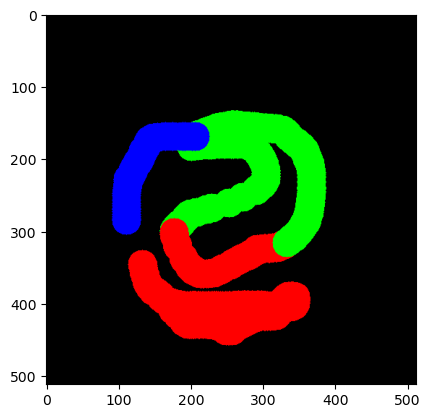

In [9]:
drawing=False
color=(0,255,0)
i=-1
def brush(event,x,y,flag,param):
    global drawing
    global i 
    global color
    if event==cv.EVENT_RBUTTONDOWN:
       colors=[(0,255,0),(255,0,0),(0,0,255)]
       color=colors[i]
       i+=1
    if event==cv.EVENT_LBUTTONDOWN:
        drawing=True
    elif event==cv.EVENT_MOUSEMOVE:  
      if drawing==True:
           cv.circle(img,(x,y),20,color,-1)
    elif event==cv.EVENT_LBUTTONUP:
        drawing=False
                                        
img=np.zeros((512,512,3),"uint8")

cv.namedWindow("image")
cv.setMouseCallback("image",brush)

while True:
    cv.imshow("image",img)
    
    if cv.waitKey(1) & 0xFF==27:
        break
cv.destroyAllWindows()
plt.imshow(img[:,:,::-1])

### Freehand Drawing with Keyboard-Controlled Colors  

This example improves the brush tool by allowing **color changes using keyboard keys** instead of the mouse.  

1. **Global variables**:  
   - `drawing` → tracks whether we are currently drawing.  
   - `color` → current drawing color (initially green).  

2. Inside the `brush` function:  
   - `EVENT_LBUTTONDOWN` → starts drawing.  
   - `EVENT_MOUSEMOVE` → while drawing, draws a circle at the mouse position with the current color.  
   - `EVENT_LBUTTONUP` → stops drawing.  

3. The function is connected to the window using `cv.setMouseCallback("image", brush)`.  
4. In the `while` loop, `cv.waitKey(1)` listens for key presses to change the drawing color:  
   - Press **`g`** → switch to green `(0,255,0)`  
   - Press **`r`** → switch to red `(0,0,255)`  
   - Press **`b`** → switch to blue `(255,0,0)`  
   - Press **Esc (27)** → exit the loop  

5. `cv.destroyAllWindows()` closes all OpenCV windows.  
6. `plt.imshow` displays the final painted image in the notebook.  

**Usage**:  
- Hold **left click** and drag → draw on the image.  
- Press **`g` / `r` / `b`** → change the color while drawing.  
- Release left click → stop drawing.  
- Press **Esc** → close the window.  


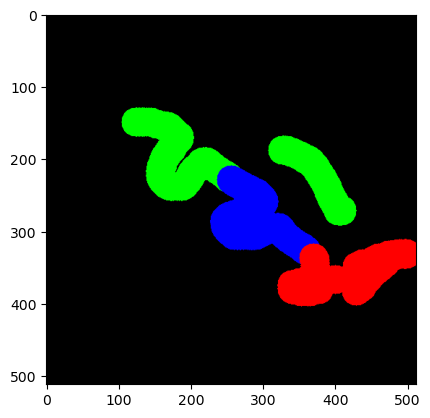

In [10]:
drawing=False
color=(0,255,0)

def brush(event,x,y,flag,param):
    global drawing
    global color
    
    if event==cv.EVENT_LBUTTONDOWN:
        drawing=True
    elif event==cv.EVENT_MOUSEMOVE:  
      if drawing==True:
           cv.circle(img,(x,y),20,color,-1)
    elif event==cv.EVENT_LBUTTONUP:
        drawing=False
                                        
img=np.zeros((512,512,3),"uint8")

cv.namedWindow("image")
cv.setMouseCallback("image",brush)

while True:
    cv.imshow("image",img)
    k=cv.waitKey(1)
    if k==ord("g"):
        color=(0,255,0)
    elif k==ord("r"):
        color=(0,0,255)
    elif k==ord("b"):
        color=(255,0,0)
    elif k==27:  
        break
cv.destroyAllWindows()
plt.imshow(img[:,:,::-1])

### Drawing Rectangles Interactively with the Mouse  

This example shows how to **draw rectangles interactively** by clicking and dragging the mouse.  

1. **Global variables**:  
   - `drawing` → tracks whether we are currently drawing.  
   - `start_point` → stores the coordinates where the left mouse button was first pressed.  

2. Inside the `rectangle_draw` function:  
   - `EVENT_LBUTTONDOWN` → starts drawing and stores the starting coordinates `(x, y)`.  
   - `EVENT_MOUSEMOVE` → while the mouse is pressed, a rectangle is drawn from `start_point` to the current mouse position. This provides a **live preview** of the rectangle.  
   - `EVENT_LBUTTONUP` → finalizes the rectangle at the endpoint `(x, y)` and stops drawing.  

3. `img.copy()` is stored in `colon` so we can **reset the image** if needed.  
4. The mouse callback is set with `cv.setMouseCallback("image", rectangle_draw)`.  
5. The `while` loop updates the window continuously:  
   - Press **`r`** → reset the canvas to the original blank image.  
   - Press **Esc (27)** → exit the loop.  

6. `cv.destroyAllWindows()` closes all OpenCV windows.  
7. `plt.imshow` displays the final image in the notebook.  

**Usage**:  
- Click and hold **left mouse button** → start drawing a rectangle.  
- Move the mouse → see the live rectangle preview.  
- Release left click → finalize the rectangle.  
- Press **`r`** → reset canvas.  
- Press **Esc** → close window.  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


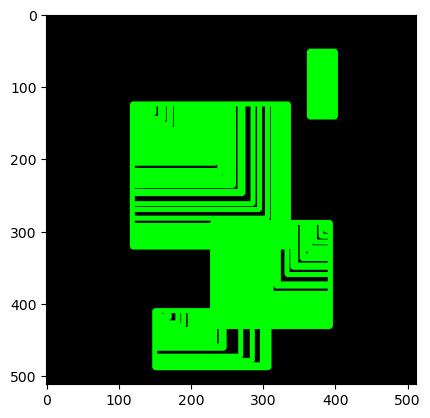

In [11]:

drawing=False
def rectangle_draw(event,x,y,flag,param):
    global drawing, start_point
    if event==cv.EVENT_LBUTTONDOWN:
        drawing=True
        start_point=(x,y)
    elif event==cv.EVENT_MOUSEMOVE:
        if drawing==True:
            cv.rectangle(img,start_point,(x,y),(0,255,0),5)
    elif event==cv.EVENT_LBUTTONUP:
        if drawing==True:
         end_point=(x,y)
         cv.rectangle(img,start_point,end_point,(0,255,0),1)
         drawing=False
img=np.zeros((512,512,3))
colon=img.copy()
cv.namedWindow("image")
cv.setMouseCallback("image",rectangle_draw)

while True:
    cv.imshow("image",img)
    k=cv.waitKey(1)
    if k ==ord("r"):
       img=colon.copy()    
    if k==27:
        break
cv.destroyAllWindows()
plt.imshow(img[:,:,::-1])

### Solving the Overlapping Rectangle Issue  

In the previous rectangle-drawing example, moving the mouse while drawing created **multiple overlapping rectangles** on the canvas.  
This happens because `cv.rectangle` was directly drawn on the main image during `EVENT_MOUSEMOVE`.

#### How this solution fixes it:

1. **Temporary copy (`temp`)**:  
   - During mouse movement (`EVENT_MOUSEMOVE`), we create a copy of the original image (`temp = img.copy()`).  
   - The rectangle is drawn only on this temporary copy.  
   - `cv.imshow` displays the temporary image, giving a **clean live preview** without altering the original image.  

2. **Final rectangle drawn on main image**:  
   - When the mouse button is released (`EVENT_LBUTTONUP`), the rectangle is drawn on the main image (`img`).  
   - This ensures only finalized rectangles persist, while temporary previews do not overlap.  

3. **Undo support**:  
   - All finalized rectangles are stored in the `points` list.  
   - Pressing **`z`** pops the last rectangle and redraws the remaining rectangles on the canvas, giving a simple **undo functionality**.  

**Result:**  
- Live preview during drawing without unwanted overlaps.  
- Ability to undo rectangles.  
- Clean and user-friendly interactive rectangle drawing.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


[[(78, 77), (242, 227)], [(350, 259), (186, 404)], [(86, 339), (113, 392)], [(307, 67), (356, 190)], [(401, 101), (478, 213)]]


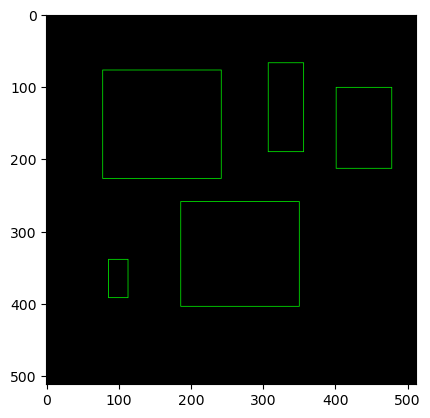

In [12]:
points=[]
drawing=False
def rectangle_draw(event,x,y,flag,param):
    global drawing, start_point
    if event==cv.EVENT_LBUTTONDOWN:
        drawing=True
        start_point=(x,y)
    elif event==cv.EVENT_MOUSEMOVE:
        if drawing==True:
            temp=img.copy()
            cv.rectangle(temp,start_point,(x,y),(0,255,0),1)
            cv.imshow("image",temp)
    elif event==cv.EVENT_LBUTTONUP:
        if drawing==True:
         end_point=(x,y)
         cv.rectangle(img,start_point,end_point,(0,255,0),1)
         points.append([start_point,end_point])   
         drawing=False
img=np.zeros((512,512,3))
colon=img.copy()
temp=img.copy()
cv.namedWindow("image")
cv.setMouseCallback("image",rectangle_draw)

while True:
    cv.imshow("image",img)
    k=cv.waitKey(1)
    if k ==ord("r"):
       img=colon.copy() 
    if k==ord("z"):
        img=colon.copy()
        points.pop()
        for i in points:
          cv.rectangle(img,i[0],i[1],(0,255,0),1)
            
    if k==27:
        break
cv.destroyAllWindows()
plt.imshow(img[:,:,::-1])
print(points)

### Interactive Image Blending with Trackbar  

This example demonstrates how to **blend two images interactively** using a trackbar in OpenCV.  

---

#### How it works:

1. **Images Setup**:  
   - `img1` → a blue image (`img1[:,:,0] = 255`)  
   - `img2` → a red image (`img2[:,:,2] = 255`)  

2. **Blending Function** (`change_weight`):  
   - `alpha` → weight of `img1` (from trackbar position)  
   - `beta` → weight of `img2` (`beta = 1 - alpha`)  
   - `cv.addWeighted(img1, alpha, img2, beta, 0)` → combines the two images using the weights.  
   - `cv.imshow` → displays the blended result in the window.  

3. **Trackbar Setup**:  
   - `cv.createTrackbar` creates a trackbar named `"alpha"` in the window `"image"`.  
   - Moving the trackbar updates the blending in real-time by calling `change_weight`.  
   - `max_value = 100` defines the trackbar range.  

4. **Execution**:  
   - Initially, `change_weight(0)` is called to show the first state.  
   - `cv.waitKey()` waits for a key press to exit.  
   - `cv.destroyAllWindows()` closes all OpenCV windows.  

---

**Usage**:  
- Move the **trackbar** to change the blending ratio between the blue and red images.  
- The **blended image** updates in real-time.  
- Press any key → close the window.  

This method is useful for **interactive experiments** where you want to control the contribution of two images dynamically.


In [3]:
title_window="image"
max_value=100
def change_weight(value):
    alpha=(value/max_value)
    beta=(1-alpha)
    total=cv.addWeighted(img1,alpha,img2,beta,0)
    cv.imshow(title_window,total)
    

img1=np.zeros((512,512,3),"uint8")
img1[:,:,0]=255
img2=np.zeros((512,512,3),"uint8")
img2[:,:,2]=255

trackbarName="alpha"
cv.namedWindow(title_window)
cv.createTrackbar(trackbarName,title_window,0,max_value,change_weight)

change_weight(0)

cv.waitKey()
cv.destroyAllWindows()

### Interactive Color Mixing with Trackbars  

This example demonstrates how to **adjust the color channels of an image interactively** using trackbars in OpenCV.  

---

#### How it works:

1. **Image Setup**:  
   - `img` → a black image of size `512x512` with 3 color channels (BGR).  

2. **Trackbars Setup**:  
   - `cv.createTrackbar` creates three trackbars named `"green"`, `"blue"`, and `"red"` in the window `"image"`.  
   - Each trackbar ranges from `0` to `255`.  
   - The callback function `do_nothing` is used because we will read the trackbar values manually in the loop.  

3. **Updating Image**:  
   - Inside the `while True` loop:  
     - `cv.getTrackbarPos` reads the current position of each trackbar.  
     - The image channels are updated according to the trackbar values:  
       - `img[:,:,0] = blue`  
       - `img[:,:,1] = green`  
       - `img[:,:,2] = red`  
     - `cv.imshow` displays the updated image in real-time.  

4. **Exit**:  
   - Press **Esc (27)** → exit the loop.  
   - `cv.destroyAllWindows()` closes all OpenCV windows.  

---

**Usage**:  
- Move the **Red, Green, and Blue trackbars** to adjust the intensity of each color channel.  
- The **image updates dynamically**, allowing interactive color mixing.  
- Press **Esc** → close the window.  

This is a simple way to experiment with **BGR color channels** and understand how each channel contributes to the final image.


In [4]:
title_window="image"
max_value=255
def do_nothing(value):
    pass
    
img=np.zeros((512,512,3),"uint8")
cv.namedWindow(title_window)
cv.createTrackbar("green",title_window,0,max_value,do_nothing) 
cv.createTrackbar("blue",title_window,0,max_value,do_nothing) 
cv.createTrackbar("red",title_window,0,max_value,do_nothing) 

while True:
    cv.imshow("image",img)
    if cv.waitKey(1)==27:
        break
    g=cv.getTrackbarPos("green",title_window)
    b=cv.getTrackbarPos("blue",title_window)
    r=cv.getTrackbarPos("red",title_window)
    img[:,:,2]=r;img[:,:,1]=g;img[:,:,0]=b
cv.destroyAllWindows()        

### Capturing Video from Webcam  

This example demonstrates how to **capture live video from a webcam** using OpenCV.  

---

#### How it works:

1. **Initialize Webcam**:  
   - `cv.VideoCapture(0)` → opens the default webcam (`0` for the first camera).  
   - If multiple cameras are connected, you can use `1`, `2`, etc., to select a different camera.  

2. **Read Frames in a Loop**:  
   - `cam.read()` → reads a frame from the webcam.  
     - `num` → boolean indicating if the frame was read successfully.  
     - `fram` → the captured frame.  
   - `cv.flip(fram, 1)` → flips the frame horizontally to act like a mirror.  
   - `cv.imshow("webcam", fram)` → displays the live video in a window.  

3. **Exit the Loop**:  
   - `cv.waitKey(1)` checks for key presses.  
   - Press **Esc (27)** → breaks the loop.  

4. **Release Resources**:  
   - `cv.destroyWindow("webcam")` → closes the webcam window.  
   - `cam.release()` → releases the webcam for other applications.  

---

**Usage**:  
- Run the script → your webcam feed appears in a window.  
- Press **Esc** → stop the webcam and close the window.  

This is a basic setup for **real-time video capture** and can be extended for tasks like face detection, object tracking, or gesture recognition.


In [5]:
cam=cv.VideoCapture(0)

while True:
    num,fram=cam.read()
    fram=cv.flip(fram,1)
    cv.imshow("webcam",fram)
    if cv.waitKey(1)==27:
        break
cv.destroyWindow("webcam")
cam.release()

### Capturing Webcam Video and Extracting a Single Color Channel  

This example demonstrates how to **capture live video from a webcam** and display only a **single color channel** (in this case, red) in real-time.  

In [6]:
cam=cv.VideoCapture(0)

while True:
    ret,fram=cam.read()
    fram=cv.flip(fram,1)
    r,g,b=cv.split(fram)
    new_img=np.zeros_like(fram)
    new_img[:,:,0]=r
    
    cv.imshow("webcam",new_img)
    if cv.waitKey(1)==27:
        break
cv.destroyWindow("webcam")
cam.release()

### Reading and Displaying a Video File in Grayscale  

This example demonstrates how to **read a video file** and display it frame by frame in **grayscale** using OpenCV.  

---

#### How it works:

1. **Open Video File**:  
   - `cv.VideoCapture("./Videos/hq1713261581456292.mp4")` → opens the specified video file.  

2. **Read Frames in a Loop**:  
   - `cam.read()` → reads each frame from the video.  
     - `ret` → boolean indicating if the frame was successfully read.  
     - `fram` → the captured frame.  
   - `if not ret: break` → stops the loop when the video ends.  

3. **Convert to Grayscale**:  
   - `cv.cvtColor(fram, cv.COLOR_RGB2GRAY)` → converts the frame from RGB to grayscale.  

4. **Display Frame**:  
   - `cv.imshow("video", fram)` → shows the current grayscale frame in a window.  

5. **Exit**:  
   - Press **Esc (27)** → stops the loop.  
   - `cv.destroyWindow("video")` → closes the window.  
   - `cam.release()` → releases the video file.  

---

**Usage**:  
- Run the script → the video plays in grayscale frame by frame.  
- Press **Esc** → stop playback and close the window.  

This method can be extended to apply **filters or processing** to each frame, such as edge detection, color channel extraction, or object tracking.


In [7]:
cam=cv.VideoCapture("./Videos/hq1713261581456292.mp4")

while True:
    ret,fram=cam.read()

    if not ret:
        break
    fram=cv.cvtColor(fram,cv.COLOR_RGB2GRAY)    
    cv.imshow("video",fram)
    if cv.waitKey(1)==27:
        break
cv.destroyWindow("video")
cam.release()

### Capturing Webcam Video and Saving to a File  

This example demonstrates how to **capture live video from a webcam** and **save it to a video file** using OpenCV.  

---

#### How it works:

1. **Initialize Webcam**:  
   - `cv.VideoCapture(0)` → opens the default webcam.  
   - `w = int(cam.get(3))` and `h = int(cam.get(4))` → get the width and height of the video frames.  

2. **Setup Video Writer**:  
   - `cv.VideoWriter_fourcc(*"XVID")` → defines the codec for the output video.  
     - Alternative codecs can be used, e.g., `"MP4V"` for MP4 format.  
   - `cv.VideoWriter("./Videos/output.avi", fourcc, 20.0, (640,480))` → creates a video writer object:  
     - `"./Videos/output.avi"` → output file path  
     - `fourcc` → codec  
     - `20.0` → frames per second (FPS)  
     - `(640,480)` → frame size  

3. **Read and Save Frames in a Loop**:  
   - `cam.read()` → reads frames from the webcam.  
   - `cv.flip(fram, 1)` → flips the frame horizontally.  
   - `out.write(fram)` → writes the frame to the output file.  
   - `cv.imshow("fram", fram)` → displays the live video.  

4. **Exit**:  
   - Press **Esc (27)** → stops the loop.  
   - `cam.release()` → releases the webcam.  
   - `out.release()` → closes the video file.  
   - `cv.destroyAllWindows()` → closes all OpenCV windows.  

---

**Usage**:  
- Run the script → webcam feed appears and is recorded to `"output.avi"`.  
- Press **Esc** → stop recording and close the window.  

This method can be extended to **apply filters or processing** to live video before saving, such as adding overlays, color adjustments, or effects.


In [12]:
cam=cv.VideoCapture(0)
w=int(cam.get(3));h=int(cam.get(4))

fourcc=cv.VideoWriter_fourcc(*"XVID")
#fourcc=cv.VideoWriter_fourcc(*'MP4V')
out=cv.VideoWriter("./Videos/output.avi",fourcc,20.0,(640,480))

while cam.isOpened():
    ret,fram=cam.read()
    if not ret:
        break
    fram=cv.flip(fram,1)    
    out.write(fram)
    cv.imshow("fram",fram)
    if cv.waitKey(1)==27:
        break

cam.release()
out.release()
cv.destroyAllWindows()    
    
    

In [14]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install pyscreenshot


   -------------------- ------------------- 2/4 [mss]
   ------------------------------ --------- 3/4 [pyscreenshot]
   ---------------------------------------- 4/4 [pyscreenshot]

Note: you may need to restart the kernel to use updated packages.


### Capturing the Screen in Real-Time  

This example demonstrates how to **capture the computer screen** and display it in real-time using **PIL** and **OpenCV**.  

---

#### How it works:

1. **Import Libraries**:  
   - `numpy` → for handling image arrays.  
   - `ImageGrab` from `PIL` → to capture screenshots.  
   - `cv2` → for displaying and processing images.  

2. **Capture Screen in a Loop**:  
   - `ImageGrab.grab()` → captures the entire screen as an image.  
   - `np.array()` → converts the captured image to a NumPy array compatible with OpenCV.  
   - `cv.imshow("screen", fram)` → displays the captured screen in a window.  

3. **Exit**:  
   - `cv.waitKey(1)` → waits for key press.  
   - Press **Esc (27)** → breaks the loop.  
   - `cv.destroyAllWindows()` → closes the window.  

---

**Usage**:  
- Run the script → a window shows the live screen capture.  
- Press **Esc** → stop capturing and close the window.  

This method is useful for **screen recording, live monitoring, or creating screen-based applications**.


In [8]:
import numpy as np
from PIL import ImageGrab
import cv2 as cv

while True:
    
    fram=np.array(ImageGrab.grab())

    cv.imshow("screen",fram)

    if cv.waitKey(1)==27:
        break

cv.destroyAllWindows()        


### Capturing a Region of the Screen  

This example demonstrates how to **capture a specific region of the screen** in real-time using **PIL** and **OpenCV**.  

---

#### How it works:

1. **Capture a Region**:  
   - `ImageGrab.grab(bbox=(500,500,1000,1000))` → captures only the region defined by the bounding box:  
     - `(x1, y1, x2, y2)` → top-left and bottom-right coordinates of the region.  
   - `np.array()` → converts the captured region to a NumPy array for OpenCV.  

2. **Display**:  
   - `cv.imshow("screen", fram)` → shows the captured region in a window.  

3. **Exit**:  
   - `cv.waitKey(1)` → waits for a key press.  
   - Press **Esc (27)** → breaks the loop.  
   - `cv.destroyAllWindows()` → closes the window.  

---

**Usage**:  
- Run the script → only the defined screen region appears in the window.  
- Press **Esc** → stop capturing and close the window.  

This is useful for **focused screen recording** or monitoring a specific part of the display, such as an application window or game area.


In [9]:
while True:
    
    fram=np.array(ImageGrab.grab(bbox=(500,500,1000,1000)))

    cv.imshow("screen",fram)

    if cv.waitKey(1)==27:
        break

cv.destroyAllWindows()        
